# Exploratary Data Analysis with Python

## Dataset: Titanic Dataset from Kaggle

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data

In [3]:
data = pd.read_csv("titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking for any missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here, we can see that category Age and Cabin has the most null values. Now, to get a proper visualization of the missing data we will use seaborn

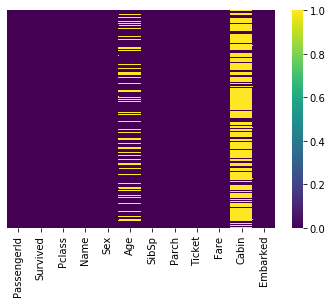

In [5]:
sns.heatmap(data.isnull(),yticklabels = False,cmap ="viridis")

Now, lets visualize some more data to get a clear picture of what the data has to say.

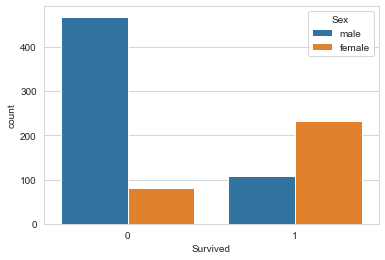

In [6]:
# analysing the number of people survived keeping the Sex parameter in mind.
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data = data)

By looking into the visualized plot we can easily state that a significant amount of male died, and a considerate amount of females survived from the Titanic

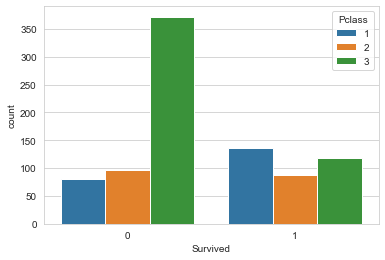

In [7]:
# analysing the number of people survived keeping the Pclass parameter in mind.
sns.set_style("whitegrid")
sns.countplot(x= "Survived",hue="Pclass",data = data)

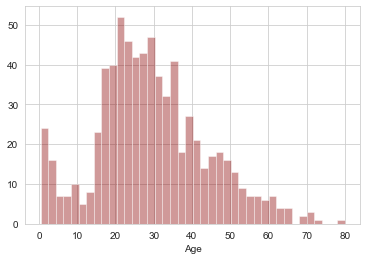

In [8]:
# lets analyse the age distribution of the total number of passengers who board the Titanic
sns.distplot(data["Age"].dropna(),kde = False,color='darkred',bins=40)

The maximium number of people were in the age group of 23 to 30 years, as per the data we can visualize

#  Data Cleaning

Here we deal with the missing values, and filling it with suitable measures

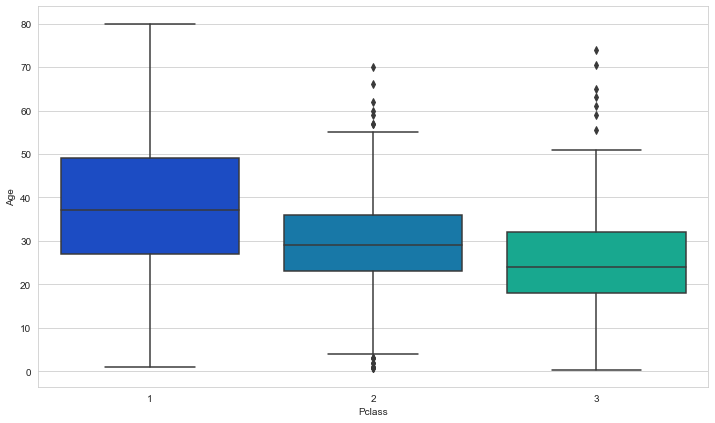

In [10]:
# creating a box plot to see the mean of ages according to there Pclass
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [12]:
#writing a function to fill the missing values with there median
def Fill_age(cols):
    Age = cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [15]:
data["Age"]= data[["Age","Pclass"]].apply(Fill_age,axis =1)

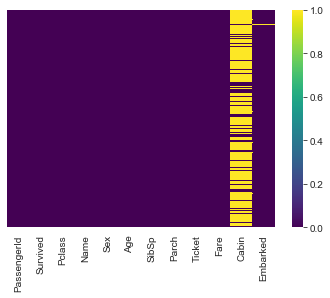

In [19]:
sns.heatmap(data.isnull(),yticklabels = False,cmap ="viridis")

In [20]:
data.drop("Cabin",axis=1,inplace = True)

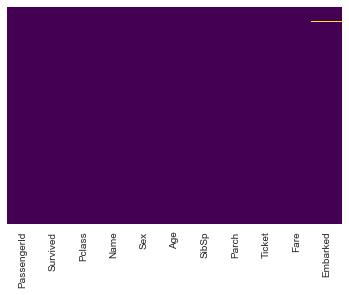

In [21]:
sns.heatmap(data.isnull(),yticklabels = False,cbar= False,cmap ="viridis")

# Converting Categorical Features

In [22]:
Sex = pd.get_dummies(data["Sex"],drop_first= True)

In [23]:
Embarked = pd.get_dummies(data["Embarked"],drop_first = True)

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
data.drop(["Sex","Embarked","Ticket","Name"],axis=1, inplace =True)

In [28]:
data= pd.concat([data,Sex,Embarked],axis=1)

In [29]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
